In [2]:
# some_file.py
# %load_ext autoreload
# %autoreload 2
from astropy.io import fits 
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(0, '/Users/hannahfronenberg/Documents/GitHub/pygdsm/pygdsm')
from pygsm2016 import GlobalSkyModel2016
from pygsm import GlobalSkyModel


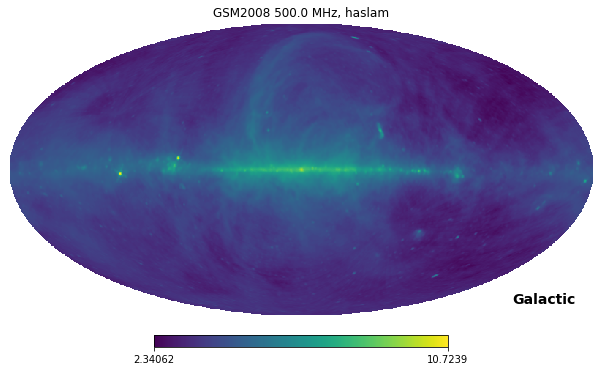

In [2]:
gsm = GlobalSkyModel(basemap = 'haslam')
gsm.generate(500)
gsm.view(logged=True)

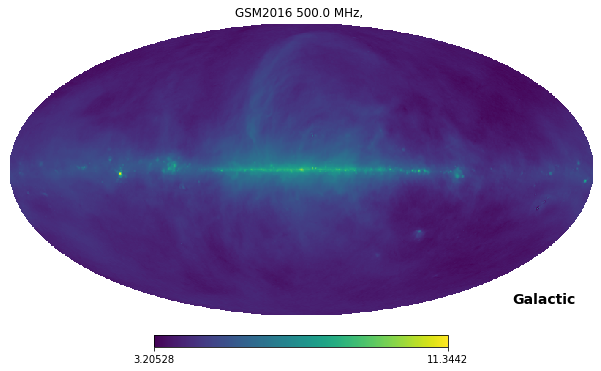

In [8]:
gsm_2016 = GlobalSkyModel2016(data_unit = 'TRJ')
gsm_2016.generate(500) # Generate at 150 MHz
gsm_2016.view(logged=True)

In [4]:
nside = 1024 # the Global sky model is in healpix format with Nside = 1024
hp.pixelfunc.ang2pix(1024,[1],[4])

array([2892335])

# Generating data file for each freq

In [14]:
freqs = [130] #put all the freqs for which you want to make a sky map here! 

for i in range(len(freqs)): 
    gsm_2016 = GlobalSkyModel2016(data_unit = 'TRJ')
    gsm_2016.generate(freqs[i]) # Generate at i MHz
    data = gsm_2016.generated_map_data
    data = data.astype(np.float32)
    data.tofile('pygdsm_%sMHz.bin'%freqs[i])

# Reading out the data

In [15]:
data_bin = np.fromfile('pygdsm_130MHz.bin', dtype=np.float32) # use complex32 s dtype

print(data_bin)


[218.56395 206.55478 202.16644 ... 246.2463  252.7558  246.42812]


# Random

In [75]:
gsm_2016.generated_map_freqs

<Quantity 150. MHz>

In [8]:
print(data)

[108.45078  101.39489   98.605156 ... 125.03033  128.82503  124.47205 ]
